# **Data** Preprocessing

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [69]:
np.random.seed(42)

In [70]:
train_df = pd.read_csv('../data/raw/train.csv', encoding='utf-8')
test_df = pd.read_csv('../data/raw/test.csv', encoding='utf-8')

In [71]:
train_df.head()

,text,culture,economic,education,environment,health,politics,right,science
0,ក្រុមកីឡាករ និងកីឡាការីនីអុំទូកបានស្រែកយ៉ាងកងរ...,1,0,0,0,0,0,0,0
1,នៅពេលដែលសម្តេចប៉ាបយាងមកកាន់ស.រ.អា នាចុងខែនេះ ព...,1,0,0,0,0,0,0,0
2,ក្រុមសិល្បករខ្មែរចំនួន៥រូប ដែលជាអ្នករស់រានមានជ...,1,0,0,0,0,0,0,0
3,សភាសហរដ្ឋអាមេរិកបានធ្វើការគោរពវិញ្ញាណក្ខន្ធបព្...,1,0,0,0,0,0,0,0
4,ការខកខានមិនបាន រៀបចំព្រះរាជពិធីបុណ្យ អុំទូក បណ...,1,0,0,0,0,0,0,0


In [72]:
test_df.head()

,text,culture,economic,education,environment,health,politics,right,science
0,រដ្ឋាភិបាលប្រទេសអូស្រ្ដាលីទើបតែបានប្រគល់គ្រឿងអ...,1,0,0,0,0,0,0,0
1,ក្រោយពីវត្តមួយចំនួននៅក្នុងរាជធានីភ្នំពេញ បានបដ...,1,0,0,0,0,0,0,0
2,អ្នកនាំពាក្យក្រសួងវប្បធម៌ និងវិចិត្រសិល្បៈ លោក...,1,0,0,0,0,0,0,0
3,ក្រុមតន្ត្រីដ៏ល្បីឈ្មោះរបស់អាមេរិកមួយដែលដឹកនាំ...,1,0,0,0,0,0,0,0
4,រដ្ឋាភិបាលកម្ពុជាបានសម្រេចបញ្ចប់កិច្ចសន្យាដែលផ...,1,0,0,0,0,0,0,0


In [73]:
print("Training Shape:",train_df.shape)
print("Testing Shape:",test_df.shape)

Training Shape: (4296, 9)
Testing Shape: (1436, 9)


In [74]:
print("Training Set\n")
print(train_df.info())
print("\n------------------------------------------------\n")
print("Testing Set\n")
print(test_df.info())

Training Set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         4296 non-null   object
 1   culture      4296 non-null   int64 
 2   economic     4296 non-null   int64 
 3   education    4296 non-null   int64 
 4   environment  4296 non-null   int64 
 5   health       4296 non-null   int64 
 6   politics     4296 non-null   int64 
 7   right        4296 non-null   int64 
 8   science      4296 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 302.2+ KB
None

------------------------------------------------

Testing Set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         1436 non-null   object
 1   culture      1436 non-null   int64 
 2   economic     1436 non-null   int6

In [75]:
print("Training Set\n")
print(train_df.isnull().sum())
print("\n------------------------------------------------\n")
print("Testing Set\n")
print(test_df.isnull().sum())

Training Set

text           0
culture        0
economic       0
education      0
environment    0
health         0
politics       0
right          0
science        0
dtype: int64

------------------------------------------------

Testing Set

text           0
culture        0
economic       0
education      0
environment    0
health         0
politics       0
right          0
science        0
dtype: int64


In [76]:
# Count and print duplicates
train_dups = train_df.duplicated().sum()
test_dups = test_df.duplicated().sum()

print(f"\nDuplicate count:")
print(f"Train duplicates: {train_dups}")
print(f"Test duplicates: {test_dups}")


Duplicate count:
Train duplicates: 35
Test duplicates: 8


In [77]:
train_text_dups = train_df['text'].duplicated().sum()
test_text_dups = test_df['text'].duplicated().sum()

print(f"\nText column duplicate count:")
print(f"Train duplicates: {train_text_dups}")
print(f"Test duplicates: {test_text_dups}")


Text column duplicate count:
Train duplicates: 337
Test duplicates: 38


In [78]:
def check_label_consistency(df, df_name):
    print(f"\nChecking {df_name} dataset for inconsistent labels:")

    text_counts = df['text'].value_counts()
    duplicate_texts = text_counts[text_counts > 1].index.tolist()

    inconsistent_count = 0
    for text in duplicate_texts[:10]:
        rows = df[df['text'] == text]
        label_cols = ['culture', 'economic', 'education', 'environment',
                     'health', 'politics', 'right', 'science']

        # If any label differs between duplicates
        if not rows[label_cols].apply(lambda x: len(x.unique()) == 1).all():
            inconsistent_count += 1
            if inconsistent_count <= 3:
                print(f"\nInconsistent labels for text: '{text[:50]}...'")
                print(rows[label_cols])

    if inconsistent_count > 0:
        print(f"\nTotal texts with inconsistent labels: {inconsistent_count}")
    else:
        print("No texts with inconsistent labels found.")

check_label_consistency(train_df, "Train")
check_label_consistency(test_df, "Test")


Checking Train dataset for inconsistent labels:

Inconsistent labels for text: 'No media source currently available...'
      culture  economic  education  environment  health  politics  right  \
16          1         0          0            0       0         0      0   
39          1         0          0            0       0         0      0   
56          1         0          0            0       0         0      0   
67          1         0          0            0       0         0      0   
71          1         0          0            0       0         0      0   
94          1         0          0            0       0         0      0   
122         1         0          0            0       0         0      0   
164         1         0          0            0       0         0      0   
173         1         0          0            0       0         0      0   
188         1         0          0            0       0         0      0   
210         1         0          0         

In [79]:
def keep_most_labels(group):
    if len(group) == 1:
        return group
    # Calculate sum of all label columns for each row
    label_cols = ['culture', 'economic', 'education', 'environment',
                 'health', 'politics', 'right', 'science']
    group['label_sum'] = group[label_cols].sum(axis=1)
    # Keep row with maximum label sum
    return group.loc[[group['label_sum'].idxmax()]]


train_df_dedup = train_df.groupby('text', as_index=False).apply(keep_most_labels)
train_df_clean = train_df_dedup.drop('label_sum', axis=1)

test_df_dedup = test_df.groupby('text', as_index=False).apply(keep_most_labels)
test_df_clean = test_df_dedup.drop('label_sum', axis=1)

print("\n" + "="*50)
print("Summary after removing text column duplicates:")
print('='*50)
print(f"Train data - Before: {train_df.shape}, After: {train_df_clean.shape}")
print(f"Test data - Before: {test_df.shape}, After: {test_df_clean.shape}")


Summary after removing text column duplicates:
Train data - Before: (4296, 9), After: (3959, 9)
Test data - Before: (1436, 9), After: (1398, 9)


In [80]:
# Check for texts that appear in both train and test sets
print("\n" + "="*50)
print("Checking for texts that appear in both train and test sets:")
print('='*50)

train_texts = set(train_df_clean['text'].unique())
test_texts = set(test_df_clean['text'].unique())

common_texts = train_texts.intersection(test_texts)
print(f"Number of texts appearing in both train and test sets: {len(common_texts)}")



Checking for texts that appear in both train and test sets:
Number of texts appearing in both train and test sets: 191


In [81]:
if len(common_texts) > 0:
    print("\nRemoving texts from test set that appear in train set...")
    test_df_final = test_df_clean[~test_df_clean['text'].isin(train_texts)]
    print(f"Test set after removing train texts: {test_df_final.shape}")

    print(f"\nSample of common texts (first 3):")
    for i, text in enumerate(list(common_texts)[:3]):
        print(f"{i+1}. '{text[:100]}...' (truncated)")
else:
    test_df_final = test_df_clean

print("\n" + "="*50)
print("Final dataset shapes:")
print('='*50)
print(f"Train data: {train_df_clean.shape}")
print(f"Test data: {test_df_final.shape}")


Removing texts from test set that appear in train set...
Test set after removing train texts: (1207, 9)

Sample of common texts (first 3):
1. 'លោក Daniel និងលោក Richard Susskind បានសរសេរនៅក្នុងសៀវភៅថ្មីរបស់ពួកគេដែលមានចំណងជើងថា «ការងារនាពេលអនាគ...' (truncated)
2. 'វីរុសកូរ៉ូណាថ្មីបាននាំឱ្យមានវិបត្តិជាច្រើននៅក្នុងប្រទេសថៃ។ បញ្ហាធំៗ មានបញ្ហាថែទាំសុខភាពនិងសេដ្ឋកិច្ច...' (truncated)
3. 'កាលពីខែឧសភាកន្លងទៅនេះ ដើម្បីបន្ថយការគិតអវិជ្ជមានមកលើខ្លួន កងកម្លាំងប្រដាប់អាវុធរបស់ចិន បានផ្តល់ជំនួយ...' (truncated)

Final dataset shapes:
Train data: (3959, 9)
Test data: (1207, 9)


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
scraping_data = pd.read_csv('../data/raw/merged_khmer_dataset.csv')

In [84]:
all_data = pd.concat([train_df_clean, test_df_clean, scraping_data], ignore_index=True)

print(f"Total unique texts: {all_data.shape[0]}")

Total unique texts: 7135


In [85]:
text_dups = all_data['text'].duplicated().sum()
print(f"Text column duplicate count: {text_dups}")

Text column duplicate count: 275


In [86]:
check_label_consistency(all_data, "All")


Checking All dataset for inconsistent labels:

Inconsistent labels for text: 'យុវជន​ខ្មែរ​ចំនួន​ប្រាំ​មួយ​នាក់ មក​ពី​វិទ្យាល័យ​ព...'
      culture  economic  education  environment  health  politics  right  \
5975        0         0          0            0       0         0      0   
6329        0         0          1            0       0         0      0   
7015        1         0          0            0       0         0      0   

      science  
5975        1  
6329        0  
7015        0  

Inconsistent labels for text: 'ជារៀងរាល់ឆ្នាំ សិស្សវិទ្យាល័យ រួមទាំងអ្នកណែនាំប្រម...'
      culture  economic  education  environment  health  politics  right  \
1118        1         0          0            0       0         0      0   
4323        0         0          1            0       0         0      0   

      science  
1118        0  
4323        0  

Inconsistent labels for text: 'ប្រជាពលរដ្ឋខ្មែរចំនួន១៧៥គ្រួសារនៅខេត្តកោះកុង បានយល...'
      culture  economic  education  environmen

In [87]:
df_dedup = all_data.groupby('text', as_index=False).apply(keep_most_labels)
df_clean = df_dedup.drop('label_sum', axis=1)

print(f"All data - Before: {all_data.shape}, After: {df_clean.shape}")

All data - Before: (7135, 9), After: (6860, 9)


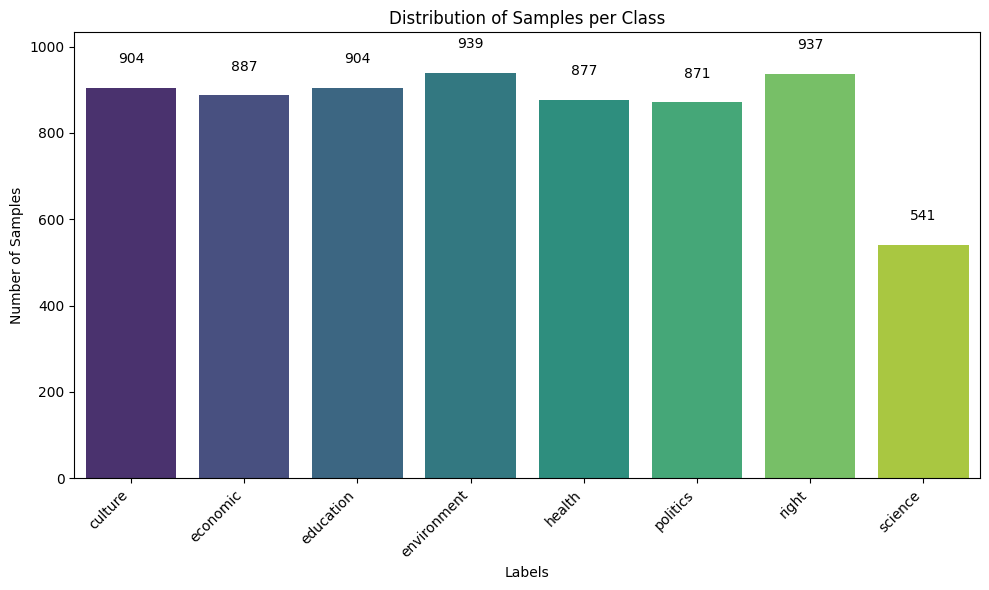

In [88]:
label_cols = ['culture', 'economic', 'education', 'environment',
              'health', 'politics', 'right', 'science']

# Count positive samples for each label in all_data
class_counts = df_clean[label_cols].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Samples per Class')
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.ylim(0, max(class_counts.values) * 1.1)
plt.xticks(rotation=45, ha='right')

# Annotate bars with counts
for index, value in enumerate(class_counts.values):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [89]:
output_path = '../data/processed/processed_khmertext_dataset.csv'
df_clean.to_csv(output_path, index=False, encoding='utf-8-sig')
df_clean.head()

,,text,culture,economic,education,environment,health,politics,right,science
0,0,<!-- IMAGE --> ដើម្បីស្តាប់ព័ត៌មាននេះ ក្រុមអ្...,0,0,0,1,0,0,0,0
1,1,<!-- IMAGE --> ដើម្បីស្តាប់ព័ត៌មាននេះ ចាប់តាំ...,0,0,0,1,0,0,0,0
2,3959,<!-- IMAGE --> ដើម្បីស្តាប់ព័ត៌មាននេះ បន្ទាប់...,0,0,0,1,0,0,0,0
3,2,<!-- IMAGE --> ដើម្បីស្តាប់ព័ត៌មាននេះ ប្រទេសក...,0,0,1,0,0,0,0,0
4,3,<!-- IMAGE --> ដើម្បីស្តាប់ព័ត៌មាននេះ ប្រទេសក...,0,0,1,0,0,0,0,0


## **Manaully Cleaning**

- Remove `<!-- IMAGE -->` tags
- Remove HTML tags like `<p>, </p>`
- Remove some garbage strings and texts

In [90]:
df_clean = pd.read_csv('../data/processed/clean_processed_khmertext_dataset.csv', encoding='utf-8-sig')
df_clean.head()

,text,culture,economic,education,environment,health,politics,right,science
0,ដើម្បីស្តាប់ព័ត៌មាននេះ ក្រុមអ្នកជំនាញខាងធនធានរ...,0,0,0,1,0,0,0,0
1,ដើម្បីស្តាប់ព័ត៌មាននេះ ចាប់តាំងពីច្រើនសប្ដាហ៍ម...,0,0,0,1,0,0,0,0
2,ដើម្បីស្តាប់ព័ត៌មាននេះ បន្ទាប់ពីប្រទេសកម្ពុជា ...,0,0,0,1,0,0,0,0
3,ដើម្បីស្តាប់ព័ត៌មាននេះ ប្រទេសកម្ពុជាបានខាតបង់ទ...,0,0,1,0,0,0,0,0
4,ដើម្បីស្តាប់ព័ត៌មាននេះ ប្រទេសកម្ពុជាបានបើកយុទ្...,0,0,1,0,0,0,0,0


In [91]:
texts = df_clean['text']
labels = df_clean[['culture', 'economic', 'education', 'environment',
                   'health', 'politics', 'right', 'science']]

# 80% train, 10% val, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(
    texts, labels,
    test_size=0.20,
    random_state=42,
    stratify=labels.values.argmax(axis=1)
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp.values.argmax(axis=1)
)

print(f"\nFinal splits:")
print(f"Train: {len(X_train)} samples ({len(X_train)/len(all_data)*100:.1f}%)")
print(f"Validation: {len(X_val)} samples ({len(X_val)/len(all_data)*100:.1f}%)")
print(f"Test: {len(X_test)} samples ({len(X_test)/len(all_data)*100:.1f}%)")


Final splits:
Train: 5487 samples (76.9%)
Validation: 686 samples (9.6%)
Test: 686 samples (9.6%)


In [92]:
# Create new DataFrames
train_final = pd.DataFrame({'text': X_train})
val_final = pd.DataFrame({'text': X_val})
test_final = pd.DataFrame({'text': X_test})

# Add labels back
for col in labels.columns:
    train_final[col] = y_train[col].values
    val_final[col] = y_val[col].values
    test_final[col] = y_test[col].values

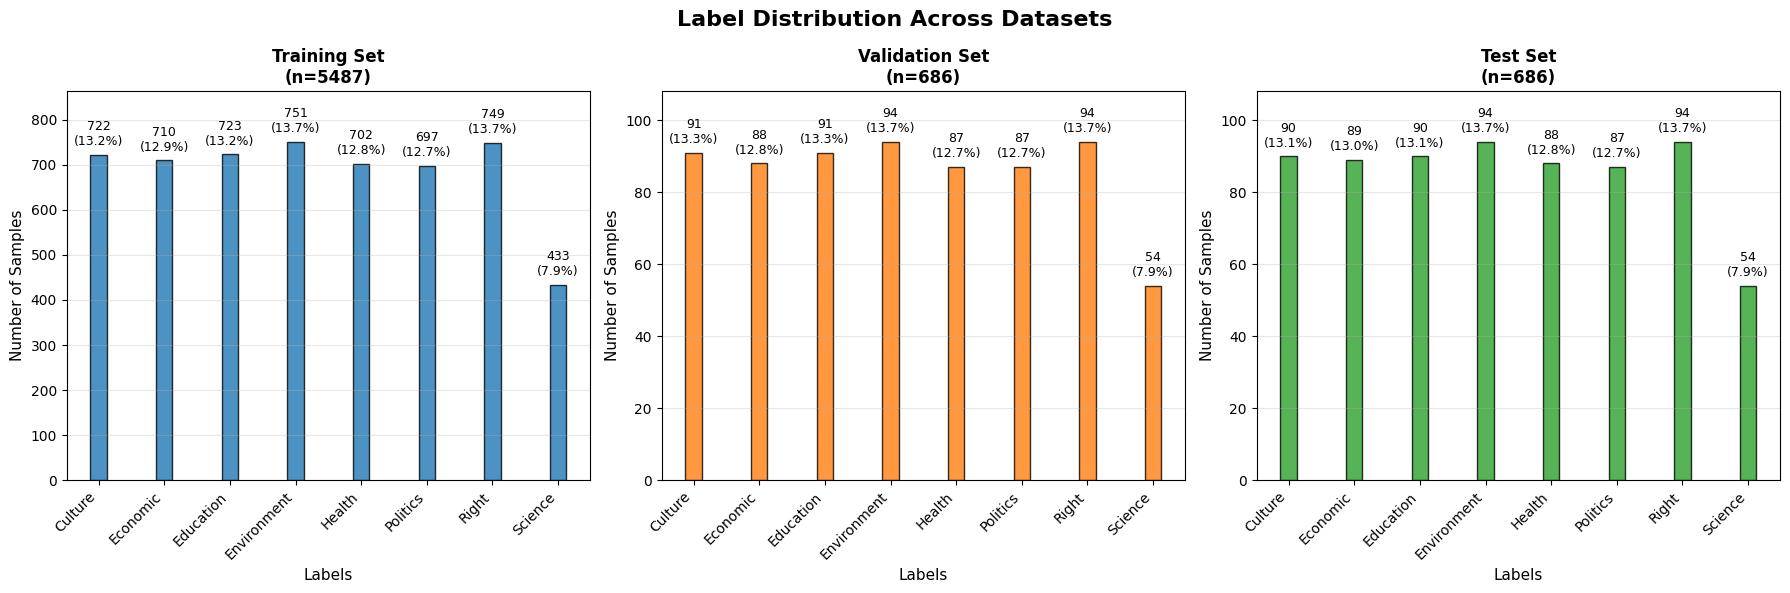

In [93]:
# Get label columns
label_cols = ['culture', 'economic', 'education', 'environment',
              'health', 'politics', 'right', 'science']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Label Distribution Across Datasets', fontsize=16, fontweight='bold')

# Define colors for each dataset
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
dataset_names = ['Training Set', 'Validation Set', 'Test Set']
datasets = [train_final, val_final, test_final]

# Bar width and positions
x = np.arange(len(label_cols))
bar_width = 0.25

for idx, (ax, dataset, name, color) in enumerate(zip(axes, datasets, dataset_names, colors)):
    # Count positive samples for each label
    counts = [dataset[col].sum() for col in label_cols]
    percentages = [count / len(dataset) * 100 for count in counts]

    # Create bars
    bars = ax.bar(x, counts, width=bar_width, color=color, alpha=0.8, edgecolor='black')

    for i, (count, percentage) in enumerate(zip(counts, percentages)):
        ax.text(i, count + max(counts)*0.02,
                f'{count}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontsize=9)

    ax.set_title(f'{name}\n(n={len(dataset)})', fontsize=12, fontweight='bold')
    ax.set_xlabel('Labels', fontsize=11)
    ax.set_ylabel('Number of Samples', fontsize=11)
    ax.set_xticks(x)
    ax.set_xticklabels([col.capitalize() for col in label_cols], rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, max(counts) * 1.15)

plt.tight_layout()
plt.show()

# **Model Implementation**

In [ ]:
# !pip install khmer-nltk
# !pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.7 MB/s eta 0:00:00


In [94]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score, classification_report, confusion_matrix
from khmernltk import word_tokenize
from joblib import load, dump
import re


from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))

In [96]:
print(f"Loaded {len(english_stopwords)} English stopwords from NLTK")
print("Preview:", sorted(list(english_stopwords))[:20])

Loaded 198 English stopwords from NLTK
Preview: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [97]:
def clean_khmer_text(text):
    if not isinstance(text, str):
        return ""

    # 1. Remove html tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # 2. Remove zero-width characters
    text = re.sub(r'[\u200B-\u200D\uFEFF]', '', text)

    # 3. Remove punctuation (Latin + Khmer)
    text = re.sub(r'[!"#$%&\'()*+,—./:;<=>?@[\]^_`{|}~។៕៖ៗ៘៙៚៛«»-]', '', text)

    # 4. Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def khmer_tokenize(text):
    cleaned = clean_khmer_text(text)
    if not cleaned:
        return ""

    tokens = word_tokenize(cleaned)

    processed_tokens = []
    for token in tokens:
        # Pure English token (letters/numbers only)?
        if re.match(r'^[a-zA-Z0-9]+$', token):
            token_lower = token.lower()
            # Remove if it's an NLTK English stopword
            if token_lower in english_stopwords:
                continue
            processed_tokens.append(token_lower)  # Lowercase content English words
        else:
            # Keep Khmer or mixed tokens as-is
            processed_tokens.append(token)

    return " ".join(processed_tokens)

In [98]:
# Apply to datasets
print("Tokenizing training data...")
train_final['text_tokenized'] = train_final['text'].apply(khmer_tokenize)


Tokenizing training data...


In [100]:
print("\nSample sentences with their tokenized versions from the training set:")
for i in range(5):
    print(f"--- Sample {i+1} ---")
    print(f"Original: {train_final['text'].iloc[i]}")
    print(f"Tokenized: {train_final['text_tokenized'].iloc[i]}")
    print("\n")


Sample sentences with their tokenized versions from the training set:
--- Sample 1 ---
Original: ក្រសួងកសិកម្ម រុក្ខាប្រមាញ់និងនេសាទ បានច្រានចោលមតិរិះគន់តាមបណ្តាញសង្គមហ្វេសប៊ុកដែលបានលើកឡើងថា ក្រសួងមិនមានមន្ត្រីបច្ចេកទេសដើម្បីចុះជួយស្វែងរកទីផ្សារ ដែលបណ្តាលឲ្យតម្លៃស្រូវអង្ករធ្លាក់ចុះទាប មិនស្របទៅនឹងតម្លៃនៃវត្ថុធាតុដើម និងថ្លៃពលកម្មសម្រាប់ប្រជាកសិករ។ ចេញផ្សាយជាសាធារណៈនៅដើមសប្តាហ៍នេះថា ការលើកឡើងថាក្រសួងមិនជួយសម្រួលទប់តម្លៃស្រូវអង្ករមិនឲ្យធ្លាក់ចុះនោះ «ផ្ទុយពីការណ៍ពិតដែលក្រសួងកំពុងនឹងបានយកចិត្តទុកដាក់លើបញ្ហានេះ ជាហេតុធ្វើឲ្យសាធារណជនដែលមិនយល់ហេតុផលមានការភាន់ច្រឡំមកលើរាជរដ្ឋាភិបាល ជាពិសេសមកលើក្រសួងកសិកម្ម រុក្ខាប្រមាញ់និងនេសាទ»។ សេចក្តីប្រកាសព័ត៌មាននោះបានបន្ថែមថា យោងតាមការស្រាវជ្រាវរបស់ក្រសួងកសិកម្ម «ស្រូវនៅមានតម្លៃសមរម្យនៅឡើយ លើកលែងតែស្រូវដែលមានគុណភាពអន់តែប៉ុណ្ណោះ»។ លោក ចាន់ ហេង នាយករងខុទ្ទកាល័យ និងជាអ្នកនាំពាក្យនៃក្រសួងកសិកម្ម បានប្រាប់ VOA នៅថ្ងៃពុធនេះថា ក្រសួងបានសហការជាមួយរោងម៉ាស៊ីនកិនស្រូវដើម្បីប្រមូលទិញស្រូវពីកសិករ ហើយតម្លៃស្រូវបានឡើងដល់កម្រិតដែលអាចទទួលយកបានហើយ។ «តាមពិតក្រសួងបានចាត់វិធ

In [101]:
print("Tokenizing validation data...")
val_final['text_tokenized'] = val_final['text'].apply(khmer_tokenize)

Tokenizing validation data...


In [102]:
print("\nSample sentences with their tokenized versions from the validation set:")
for i in range(5):
    print(f"--- Sample {i+1} ---")
    print(f"Original: {val_final['text'].iloc[i]}")
    print(f"Tokenized: {val_final['text_tokenized'].iloc[i]}")
    print("\n")


Sample sentences with their tokenized versions from the validation set:
--- Sample 1 ---
Original: រដ្ឋាភិបាលអ៊ីតាលីបានចេញបទបញ្ជាបន្ទាន់ថ្មីមួយនៅថ្ងៃអាទិត្យនេះដើម្បីដាក់កំហិតការធ្វើដំណើររបស់ប្រជាពលរដ្ឋអ៊ីតាលីប្រហែល ២៥ ភាគរយ។ ប្រទេសអ៊ីតាលីមានករណីស្លាប់ដោយសារជំងឺ COVID-19 ច្រើនជាងប្រទេសណាៗទាំងអស់ក្រៅពីប្រទេសចិន។ បន្ទាប់ពីមានករណីស្លាប់ដោយសារជំងឺនេះជាង ២៣០ ករណីមក រដ្ឋាភិបាលអ៊ីតាលីបានសម្រេចបិទតំបន់ភាគខាងជើងនៃប្រទេស ដែលក្នុងនោះមានទាំងតំបន់ Lombardy និងទីក្រុង Milan ដែលជាទីក្រុងហិរញ្ញវត្ថុផងដែរ។ ជាងនេះទៀត រដ្ឋាភិបាលនឹងបិទខេត្តចំនួន ១៤ ផ្សេងទៀត ដែលរួមមានទាំងខេត្ត Veneto ដែលជាទីតាំងនៃទីក្រុង Venice ផងដែរ។ ការធ្វើដំណើរចូលនិងចេញពីតំបន់ទាំងនេះនឹងរងការដាក់កំហិតតឹងតែងរហូតដល់ដើមខែក្រោយ ស្របពេលដែលរដ្ឋាភិបាលអ៊ីតាលីកំពុងប្រឹងប្រែងធ្វើយ៉ាងណាឲ្យចំនួនអ្នកស្លាប់ដោយសារមេរោគកូរ៉ូណាថ្មីនេះធ្លាក់ចុះ។ បន្ថែមពីនេះទៀត រដ្ឋាភិបាលអ៊ីតាលីបានបញ្ជាឲ្យបិទសារមន្ទីរ រោងមហោស្រព រោងភាពយន្ត និងកន្លែងកម្សាន្តផ្សេងៗទៀត។ ជាងនេះទៀត អ៊ីតាលីបានស្នើឲ្យគ្រូពេទ្យចូលនិវត្តន៍នានាត្រឡប់មកជួយដើម្បីរារាំងការឆ្លងរាលដាលបន្ថែមទៀតនៃមេរោគនេះ។

In [103]:
print("Tokenizing testing data...")
test_final['text_tokenized'] = test_final['text'].apply(khmer_tokenize)

Tokenizing testing data...


In [104]:
print("\nSample sentences with their tokenized versions from the testing set:")
for i in range(5):
    print(f"--- Sample {i+1} ---")
    print(f"Original: {test_final['text'].iloc[i]}")
    print(f"Tokenized: {test_final['text_tokenized'].iloc[i]}")
    print("\n")


Sample sentences with their tokenized versions from the testing set:
--- Sample 1 ---
Original: សកម្មជនគាំទ្រលទ្ធិប្រជាធិបេតយ្យក្រុងហុងកុង ១០ នាក់ ត្រូវបានកាត់ទោសឲ្យជាប់ពន្ធនាគារនៅចិនដីគោក ចំពោះការប៉ុនប៉ងរត់គេចខ្លួនចេញពីទីក្រុងពាក់កណ្តាលស្វយ័តនេះ តាមទូកលឿននៅពាក់កណ្តលឆ្នាំនេះ។ ក្នុងអំឡុងពេលនៃសវនាការតុលាការ នៅក្នុងទីក្រុង Shenzhen ភាគខាងត្បូងចិន នៅថ្ងៃពុធនេះ សកម្មជន ៨ នាក់ ត្រូវបានកាត់ទោសឲ្យជាប់ពន្ធនាគារ ៧ ខែ ចំពោះបទចោទប្រកាន់ពីការឆ្លងកាត់ព្រំដែនខុសច្បាប់ នៅពេលដែលពួកគេត្រូវបានចាប់ខ្លួនកាលពីខែសីហា ដោយឆ្មាំការពារដែនសមុទ្រចិន ខណៈដែលព្យាយាមគេចទៅកាន់កោះតៃវ៉ាន់។ សកម្មជន ២ នាក់ទៀតគឺឈ្មោះ Quinn Moon អាយុ ៣៣ ឆ្នាំ និង Tang Kai-yin អាយុ ៣១ ឆ្នាំ ត្រូវបានចោទប្រកាន់ពីការរៀបចំការឆ្លងដែនខុសច្បាប់ ហើយត្រូវបានកាត់ទោសឲ្យជាប់ពន្ធនាគារ រយៈពេល ២ ឆ្នាំនិង ៣ ឆ្នាំ។ សកម្មជនទាំងអស់ ក៏នឹងទទួលការផាកពិន័យប្រាក់ពីរវាង ១.៥០០ ដុល្លារទៅ ៣.០០០ ដុល្លារដែរ។ ជនជាប់ចោទ ត្រូវបានគេនិយាយថា បានសារភាពទទួលកំហុស ដោយសង្ឃឹមថា បានទទួលការបន្ធូរបន្ថយទោស។ ពួករដ្ឋអាជ្ញា បាននិយាយថា អនីតិជន ២ នាក់ដែលត្រូវបានចាប់ខ្លួនដែរ នៅពេលធ្វើដំណើរមិន

In [105]:
# Safety cleanup: Ensure all text_tokenized are non-empty strings
def safe_string(text):
    if not isinstance(text, str) or not text.strip():
        return ""
    return text.strip()

train_final['text_tokenized'] = train_final['text_tokenized'].apply(safe_string)
val_final['text_tokenized']   = val_final['text_tokenized'].apply(safe_string)
test_final['text_tokenized']  = test_final['text_tokenized'].apply(safe_string)

print("Any non-string or empty after cleanup?")
print("Train: ", train_final['text_tokenized'].apply(lambda x: not isinstance(x, str) or not x).sum())
print("Validation: ", val_final['text_tokenized'].apply(lambda x: not isinstance(x, str) or not x).sum())
print("Test: ", test_final['text_tokenized'].apply(lambda x: not isinstance(x, str) or not x).sum())

Any non-string or empty after cleanup?
Train:  60
Validation:  9
Test:  8


In [106]:
# Drop rows where text_tokenized is an empty string
train_final = train_final[train_final['text_tokenized'] != ""]
val_final   = val_final[val_final['text_tokenized']   != ""]
test_final  = test_final[test_final['text_tokenized']  != ""]

# Reset the index to keep it clean
train_final.reset_index(drop=True, inplace=True)
val_final.reset_index(drop=True, inplace=True)
test_final.reset_index(drop=True, inplace=True)

# Verify the count is now 0
print("Remaining empty rows:")
print("Train:", (train_final['text_tokenized'] == "").sum())
print("Val:  ", (val_final['text_tokenized'] == "").sum())
print("Test: ", (test_final['text_tokenized'] == "").sum())

Remaining empty rows:
Train: 0
Val:   0
Test:  0


In [107]:
print("Tokenized datasets saved:")
print(f"  - train_tokenized.csv ({len(train_final)} samples)")
print(f"  - val_tokenized.csv ({len(val_final)} samples)")
print(f"  - test_tokenized.csv ({len(test_final)} samples)")

Tokenized datasets saved:
  - train_tokenized.csv (5427 samples)
  - val_tokenized.csv (677 samples)
  - test_tokenized.csv (678 samples)


In [108]:
train_final = train_final.drop(columns=['text'])
val_final = val_final.drop(columns=['text'])
test_final = test_final.drop(columns=['text'])

new_order = [
    'text_tokenized', 
    'culture', 
    'economic', 
    'education', 
    'environment', 
    'health', 
    'politics', 
    'right', 
    'science'
]

train_final = train_final[new_order]
val_final = val_final[new_order]
test_final = test_final[new_order]

# Save
train_final.to_csv('../data/processed/train_tokenized.csv', index=False, encoding='utf-8-sig')
val_final.to_csv('../data/processed/val_tokenized.csv', index=False, encoding='utf-8-sig')
test_final.to_csv('../data/processed/test_tokenized.csv', index=False, encoding='utf-8-sig')